# Phase 2 - Week 1 - Day 3 PM - Natural Language Processing (NLP) - Word2Vec Demo

---
## A. Connecting Google Colab with Google Drive

In [ ]:
# Mount Google Drive into Google Colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Change Directory to `My Drive`

%cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
# Check Contents of Current Directory

!ls

'Colab Notebooks'   Other   word2vec-model
'Meet Recordings'   Temp    word2vec_wikipedia_id


As you can see, there is a folder named `word2vec_wikipedia_id` in our current directory. Let's change current directory to this directory.

In [ ]:
# Change Current Directory into `word2vec_wikipedia_id`

%cd word2vec_wikipedia_id/

/content/gdrive/My Drive/word2vec_wikipedia_id


In [ ]:
# Check Contents of Current Directory

!ls

word2vec_wikipedia_id.model
word2vec_wikipedia_id.model.trainables.syn1neg.npy
word2vec_wikipedia_id.model.wv.vectors.npy


## B. Train Word2Vec

**Notes : Do not run or uncomment section B2 and B3 unless you want train with your own version. This is because the processing time is too long.**

---
### B.1. Import Libraries

In [ ]:
# Import Libraries

import sys
import multiprocessing
import multiprocessing
from gensim.models import Word2Vec
from gensim.corpora import WikiCorpus
from gensim.models.word2vec import LineSentence

---
### B.2 Download Dataset

In [ ]:
# # Download Dataset from Wikipedia

# !wget https://dumps.wikimedia.org/idwiki/latest/idwiki-latest-pages-articles.xml.bz2

In [ ]:
# # Create Indexes to Make Processing Time Faster

# namaFileInput = "idwiki-latest-pages-articles.xml.bz2"
# namaFileOutput = "wiki.id.case.text"

# space = " "
# i = 0

# output = open(namaFileOutput, 'w')

# # `lower=False` indicates capital letter and lower letter is different.
# wiki = WikiCorpus(namaFileInput, dictionary={}, lower=True)
# for text in wiki.get_texts():
#     output.write(' '.join(text) + '\n')
#     i = i + 1
#     if i % 10000 == 0:
#       print(f"[INFO] Menyimpan {i} artikel")

# output.close()
# print(f"[INFO] Selesai menyimpan {i} artikel")

---
### B.3. Model Training

In [ ]:
# # Model Training
# namaFileInput = "wiki.id.case.text"
# namaFileOutput = "word2vec_wikipedia_id.model"

# model = Word2Vec(LineSentence(namaFileInput), size=300, window=5, min_count=5, workers=multiprocessing.cpu_count())

# # Trim Unneeded Model's Memory (Use Less RAM)
# model.init_sims(replace=True)
# model.save(namaFileOutput)

---
### B.4. Load Model

In [ ]:
# Load Model

model = Word2Vec.load("word2vec_wikipedia_id.model")

---
### B.5. Time to Play

In [ ]:
# Get Similar Token of `honda`

model.wv.most_similar('honda')

[('yamaha', 0.7266842722892761),
 ('ducati', 0.6713883280754089),
 ('toyota', 0.6677179932594299),
 ('peugeot', 0.6342762112617493),
 ('daihatsu', 0.6046753525733948),
 ('nissan', 0.6046150922775269),
 ('impreza', 0.5994459390640259),
 ('suzuki', 0.5958170890808105),
 ('mobilio', 0.5939834713935852),
 ('repsol', 0.5898582935333252)]

In [ ]:
# Check Cosine Similarity between Vector `honda` and `yamaha`

import numpy as np

cos_theta = (model.wv['honda'] @ model.wv['yamaha']) / (np.linalg.norm(model.wv['honda']) * np.linalg.norm(model.wv['yamaha']))
cos_theta

0.7266843

In [ ]:
# Let's See The Contents of Vector of Token `honda`

model.wv['honda']

array([-2.64853978e+00,  1.32281691e-01, -8.39742839e-01, -7.05314279e-01,
        1.67498422e+00,  1.24566805e+00,  5.07839084e-01,  1.12601054e+00,
       -6.76555097e-01,  4.13881034e-01, -4.96812075e-01, -3.81453395e-01,
       -9.19490159e-01,  2.89448649e-02, -1.23345292e+00,  1.37873545e-01,
       -2.62883127e-01, -5.06269634e-01,  2.17022359e-01, -2.15815854e+00,
        1.48650801e+00,  1.01866579e+00, -7.63830602e-01,  1.56776860e-01,
       -1.80632606e-01, -1.40584111e+00,  1.61616623e+00, -9.81522441e-01,
        2.19996572e+00,  1.03403199e+00,  8.49313676e-01, -3.03732336e-01,
       -2.35155559e+00, -9.72887635e-01, -3.67933297e+00,  1.84159085e-01,
       -1.60265326e+00, -1.23045325e+00,  6.09150203e-03, -9.26025331e-01,
       -6.35317937e-02,  5.77883422e-01, -7.31342673e-01,  6.03878379e-01,
       -1.22144245e-01, -2.36967102e-01, -1.48471725e+00, -3.33126259e+00,
        3.46193522e-01, -5.90111196e-01, -1.85083187e+00,  6.68047309e-01,
        1.79755962e+00, -

In [ ]:
# Check Shape of Vector `honda`

model.wv['honda'].shape

(300,)

In [ ]:
# Get Top 5 Similar Token of `presiden`

model.wv.similar_by_word("presiden", topn=5)

[('presidennya', 0.6667125225067139),
 ('wapres', 0.6601781249046326),
 ('kepresidenan', 0.6310103535652161),
 ('menlu', 0.5578266978263855),
 ('president', 0.5535454154014587)]

---
### B.6. Visualization Vectors in 2D

Let's create visualization of vectors to see their similarities in 2D plot.

In [ ]:
# Import Libraries

import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
# Define the Tokens

words = ["pepaya", "pisang", "apel", "samsung", "apple", "ayam", "bebek"]
word_vector = []
for w in words:
  word_vector.append(model.wv[w])

In [ ]:
# Reduce The Dimensions using PCA

pca = PCA(n_components=2)
word_red = pca.fit_transform(word_vector)
word_red = pd.DataFrame(word_red)
word_red['label'] = words
word_red

,0,1,label
0,-2.707756,4.376945,pepaya
1,-5.560086,6.904433,pisang
2,-1.230609,8.256100,apel
3,11.079570,-2.629896,samsung
4,14.408538,-1.989229,apple
5,-10.669966,-7.259429,ayam
6,-5.319691,-7.658925,bebek


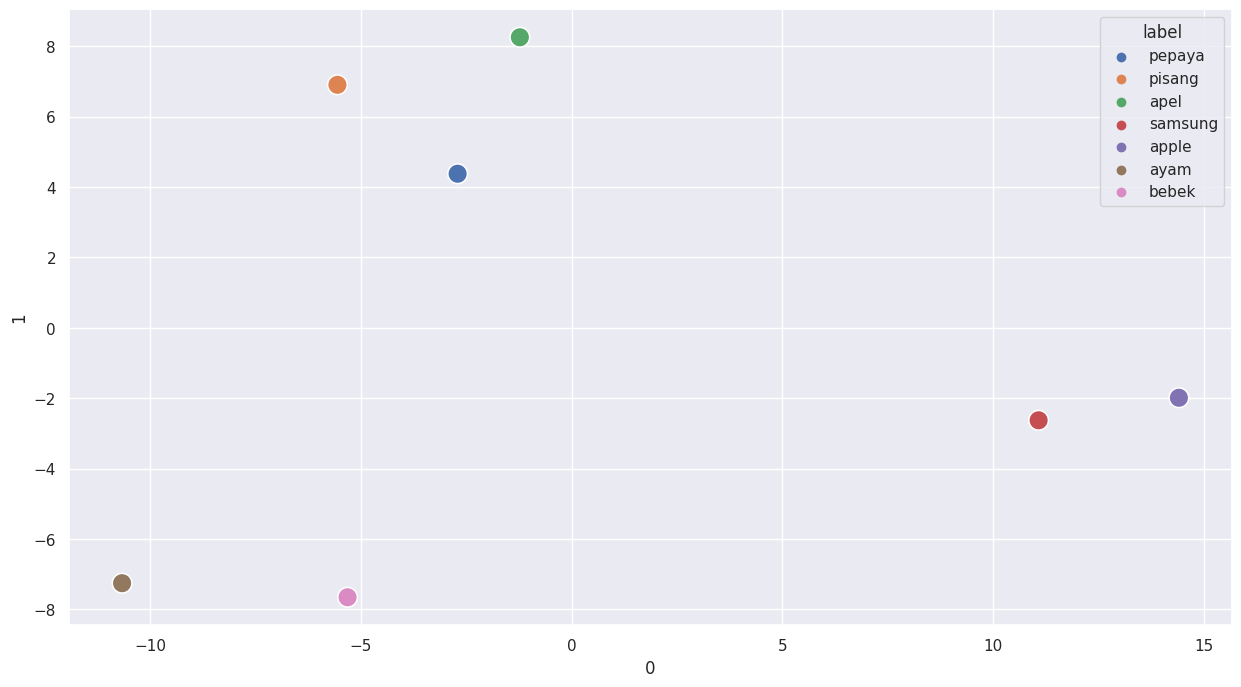

In [ ]:
# Visualiza the Vectors

sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=word_red, x=0, y=1, hue='label', s=200);